In [2]:
%matplotlib inline  
%pylab inline
import pandas as pd
mammals = pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Experts Lab\ML\sleep.txt",sep='\t')
mammals

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


In [3]:
# adding to extra colums
mammals['BodtWt_sqr']=mammals['BodyWt']**2
mammals['BodtWt_cube']=mammals['BodyWt']**3
mammals

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,BodtWt_sqr,BodtWt_cube
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,4.427572e+07,2.946106e+11
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,1.000000e+00,1.000000e+00
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,1.145822e+01,3.878609e+01
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,8.464000e-01,7.786880e-01
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.487209e+06,1.652292e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3,4.000000e+00,8.000000e+00
58,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2,1.081600e-02,1.124864e-03
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4,1.755610e+01,7.356006e+01
60,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1,1.225000e+01,4.287500e+01


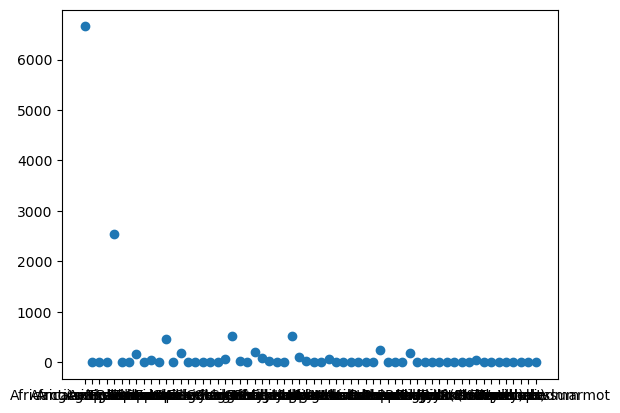

In [4]:
plt.scatter(mammals['Species'],mammals['BodyWt'])

In [8]:
#standardization
from sklearn.preprocessing import StandardScaler
x=mammals[['BodyWt','BodtWt_sqr','BodtWt_cube']]
y=mammals[['BrainWt']]
x.shape

(62, 3)

In [6]:
y.shape

(62, 1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(49, 3)
(13, 3)
(49, 1)
(13, 3)


In [7]:
# standardization
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [8]:
scalary=StandardScaler()
y_train=scalary.fit_transform(y_train)
y_test=scalary.transform(y_test)

In [9]:
# to find the value of alpha :- grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
lambda_range=np.linspace(0.01,0.2,25)
lambda_range

array([0.01      , 0.01791667, 0.02583333, 0.03375   , 0.04166667,
       0.04958333, 0.0575    , 0.06541667, 0.07333333, 0.08125   ,
       0.08916667, 0.09708333, 0.105     , 0.11291667, 0.12083333,
       0.12875   , 0.13666667, 0.14458333, 0.1525    , 0.16041667,
       0.16833333, 0.17625   , 0.18416667, 0.19208333, 0.2       ])

In [10]:
lambda_grid=[{'alpha':lambda_range}]
model1=Ridge(max_iter=10000)
model2=Lasso(max_iter=10000)

# Ridge

In [11]:
# Ridge
cv_ridge=GridSearchCV(estimator=model1,param_grid=lambda_grid,cv=20)

In [12]:
cv_ridge.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=Ridge(max_iter=10000),
             param_grid=[{'alpha': array([0.01      , 0.01791667, 0.02583333, 0.03375   , 0.04166667,
       0.04958333, 0.0575    , 0.06541667, 0.07333333, 0.08125   ,
       0.08916667, 0.09708333, 0.105     , 0.11291667, 0.12083333,
       0.12875   , 0.13666667, 0.14458333, 0.1525    , 0.16041667,
       0.16833333, 0.17625   , 0.18416667, 0.19208333, 0.2       ])}])

In [13]:
best_lambda_value=cv_ridge.best_params_['alpha']
best_lambda_value

0.09708333333333334

In [14]:
brain_ridge=Ridge(alpha=best_lambda_value,max_iter=10000)
brain_ridge.fit(x_train,y_train)

Ridge(alpha=0.09708333333333334, max_iter=10000)

In [15]:
brain_ridge.coef_

array([[ 1.62860511,  0.43051159, -1.17947852]])

# Lasso

In [16]:
# Lasso
import sklearn.model_selection as ms
cv_lasso=GridSearchCV(estimator=model2,param_grid=lambda_grid,cv=ms.KFold(n_splits=2))

In [17]:
cv_lasso.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Lasso(max_iter=10000),
             param_grid=[{'alpha': array([0.01      , 0.01791667, 0.02583333, 0.03375   , 0.04166667,
       0.04958333, 0.0575    , 0.06541667, 0.07333333, 0.08125   ,
       0.08916667, 0.09708333, 0.105     , 0.11291667, 0.12083333,
       0.12875   , 0.13666667, 0.14458333, 0.1525    , 0.16041667,
       0.16833333, 0.17625   , 0.18416667, 0.19208333, 0.2       ])}])

In [18]:
best_lambda_lasso=cv_lasso.best_params_['alpha']
best_lambda_lasso

0.01

In [19]:
brain_lasso=Lasso(alpha=best_lambda_lasso,max_iter=10000)
brain_lasso.fit(x_train,y_train)

Lasso(alpha=0.01, max_iter=10000)

In [21]:
brain_lasso.coef_

array([ 1.61036959, -0.        , -0.72580137])

In [24]:
# lasso prediction
lasso_prediction=brain_lasso.predict(x_test)
ridge_prediction=brain_ridge.predict(x_test)

In [25]:
print('rss lasso',np.mean((lasso_prediction-y_test)**2))
print('rss ridge',np.mean((ridge_prediction-y_test)**2))

rss lasso 0.02617932094564166
rss ridge 0.004039779248734288


In [26]:
brain_lasso.score(x_train,y_train)

0.9563652658605168

In [27]:
brain_ridge.score(x_train,y_train)

0.961365082994928

In [29]:
brain_lasso.score(x_test,y_test)

0.6387661094368704

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,lasso_prediction)

0.6387661094368704